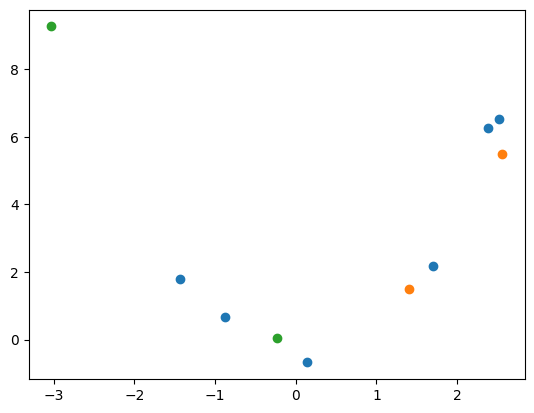

(6, 2, 2)

In [211]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

N = 10
seed = 123

X = np.array([[i] for  i in (np.linspace(-3,3,N) + np.random.normal(0,1,N))])
y = X.flatten() ** 2 + np.random.normal(0,0.5,N)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=seed)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15/0.8, random_state=seed)

plt.scatter(X_train.flatten(),y_train)
plt.scatter(X_valid.flatten(),y_valid)
plt.scatter(X_test.flatten(),y_test)
plt.show()

len(X_train), len(X_test), len(X_valid)

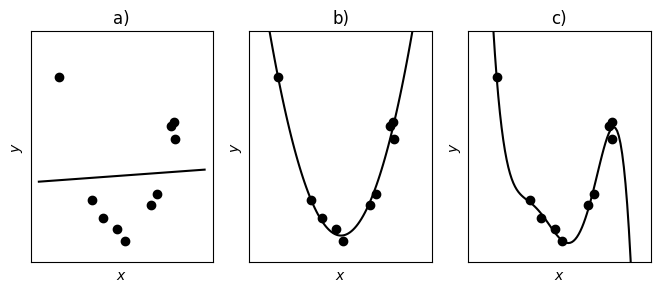

In [260]:
y1 = np.poly1d(np.polyfit(X.flatten(),y,1))
y2 = np.poly1d(np.polyfit(X.flatten(),y,2))
y3 = np.poly1d(np.polyfit(X.flatten(),y,5))
x = np.linspace(-4,4,100)
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.plot(x,y1(x),'k-')
plt.plot(X.flatten(),y,'ko')
plt.xticks([])
plt.yticks([])
plt.ylim([-2,12])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('a)')
plt.subplot(1,3,2)
plt.plot(x,y2(x),'k-')
plt.plot(X.flatten(),y,'ko')
plt.xticks([])
plt.yticks([])
plt.ylim([-2,12])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('b)')
plt.subplot(1,3,3)
plt.plot(x,y3(x),'k-')
plt.plot(X.flatten(),y,'ko')
plt.xticks([])
plt.yticks([])
plt.ylim([-2,12])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('c)')
plt.show()

1/1 [==============================] - 0s 197ms/step


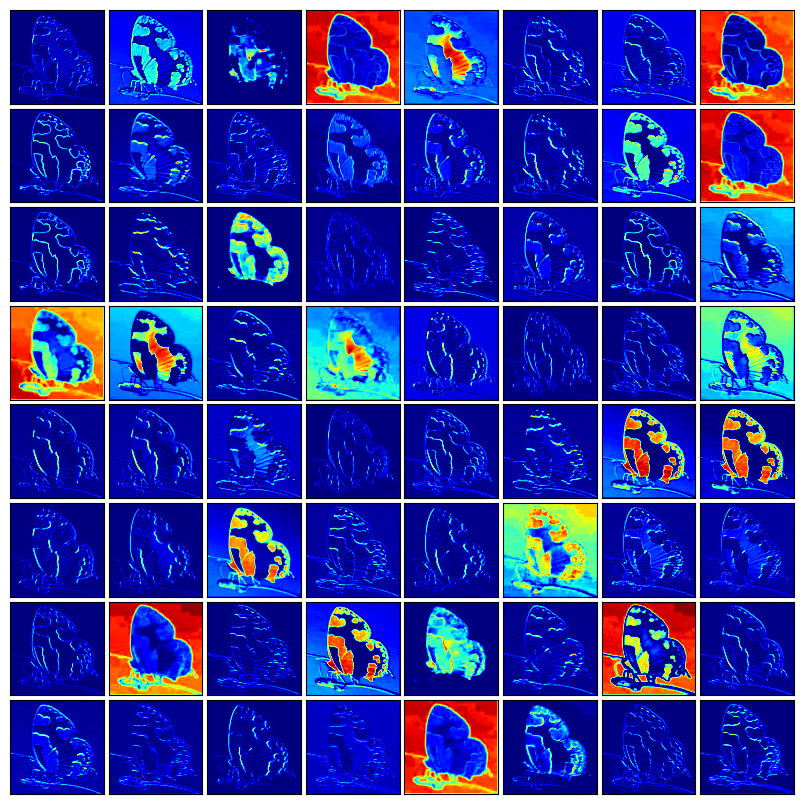

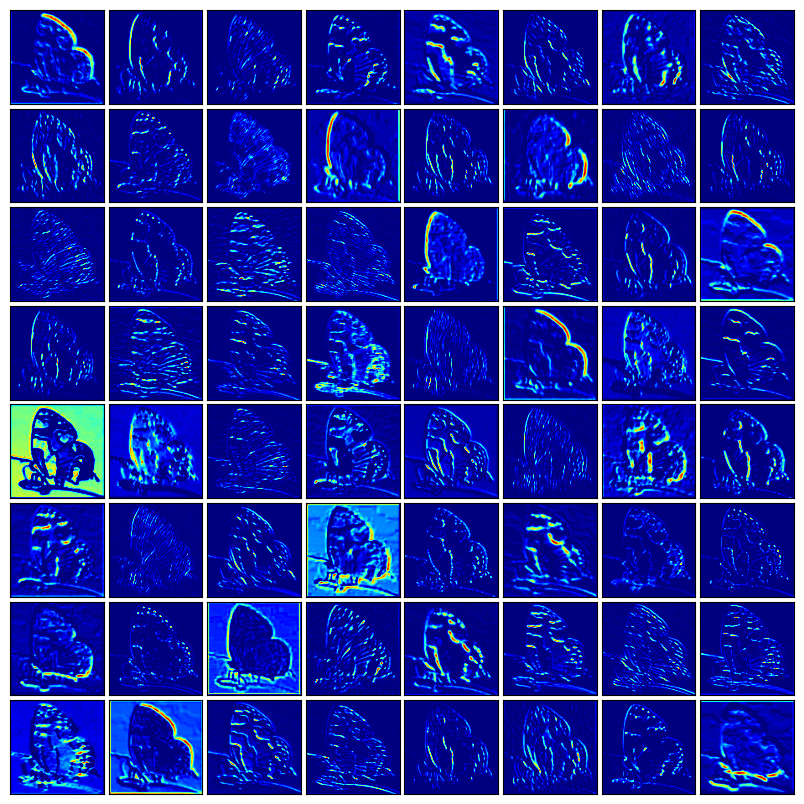

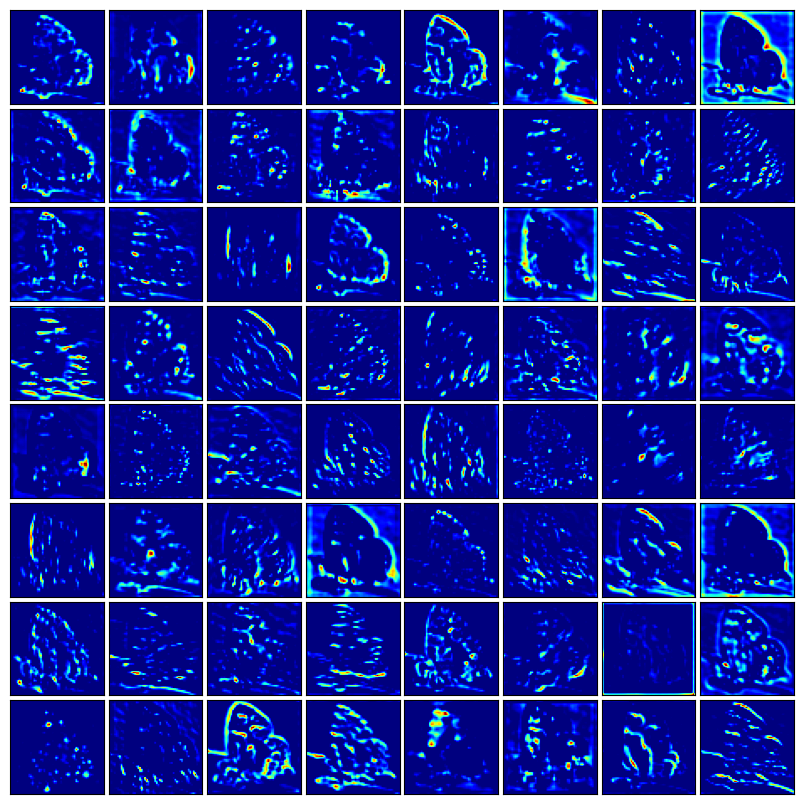

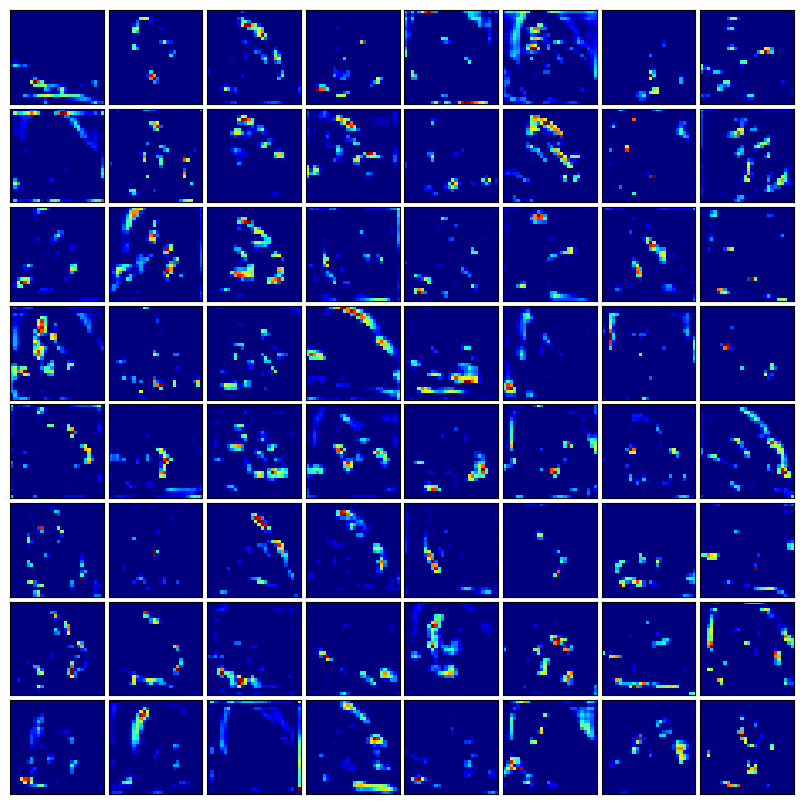

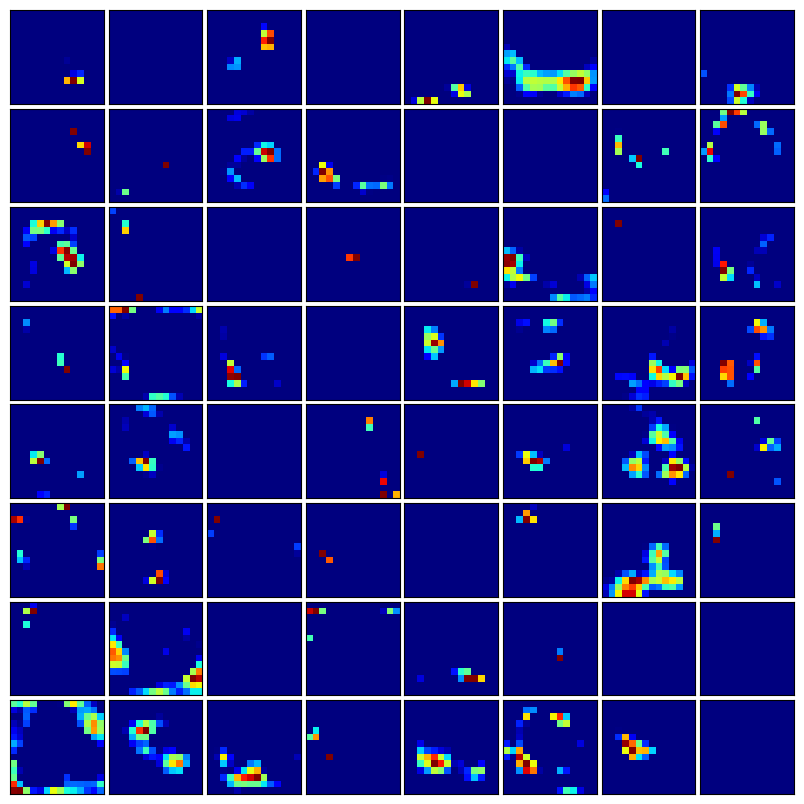

In [5]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('D:\\Master thesis\\MasterThesis-1\\kaggle dataset\caleta elna\\0t3.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    pyplot.figure(figsize=(8,8))
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='jet')
            ix += 1
            # show the figure

    pyplot.subplots_adjust(left=0.01,
                    bottom=0.01,
                    right=0.99,
                    top=0.99,
                    wspace=0.05,
                    hspace=0.05)
    pyplot.show()

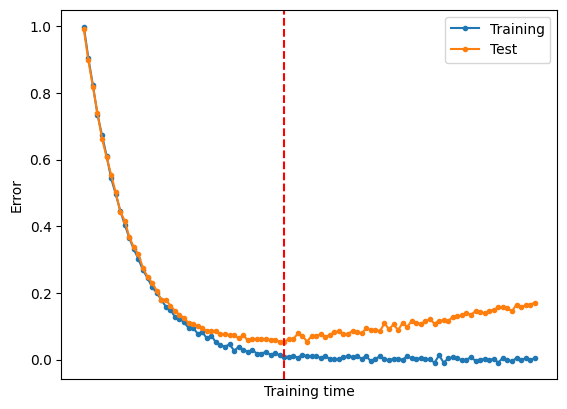

In [102]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2,100)
y = 5 * np.exp(-5*x) + 0.3 * x**1.5
z = 5 * np.exp(-5*x)
y /= 5
y += np.random.normal(0,0.006,100)
z /= 5
z += np.random.normal(0,0.005,100)
x0 = x[np.argmin(y)]

plt.plot(x,z,'.-', label='Training')
plt.plot(x,y,'.-', label='Test')
plt.axvline(x0,c='r',linestyle='--')
plt.xticks([])
plt.xlabel('Training time')
plt.ylabel('Error')
plt.legend()
#plt.annotate('Underfitting region')
plt.show()

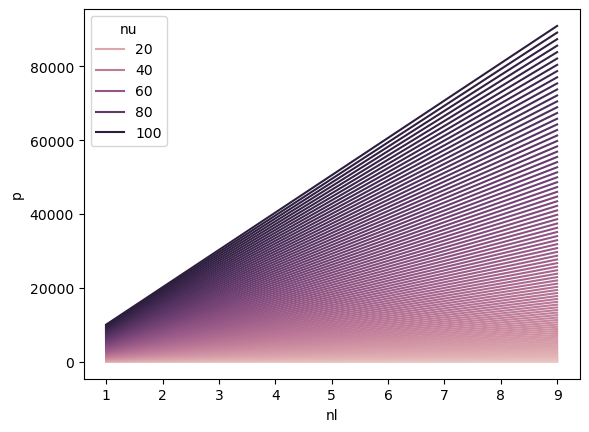

In [23]:
import tensorflow as tf
m = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,100)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100)
])
def no_params(nl,nu):
    return sum([(nu+1)*nu for _ in range(nl)])

rows = []
for i in range(1,10):
    for j in range(1,101):
        rows.append({'nl':i,'nu':j,'p':no_params(i,j)})

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(rows)
sns.lineplot(data=df, hue='nu',y='p',x='nl')
#plt.yscale('log')
#plt.xscale('log')
plt.show()

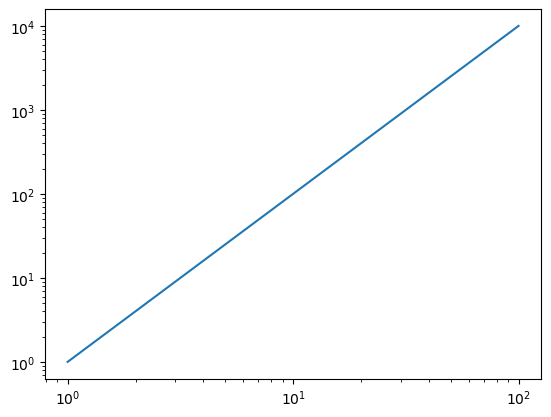

In [19]:
import numpy as np
x = np.linspace(1,100,1000)
y = x ** 2
plt.plot(x,y)
plt.yscale('log')
plt.xscale('log')
plt.show()

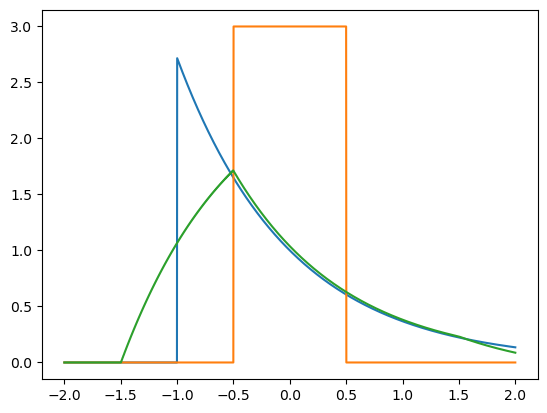

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
X = np.linspace(-2,2,2000)
f = np.vectorize(lambda x: np.exp(-x) if x and x >= -1 else 0.0) 
g = lambda x: 3 if x < 0.5 and x > -0.5 else 0.0
g = np.vectorize(g)

plt.plot(X,f(X))
plt.plot(X,g(X))

fg = []

for t in X:
    tmp_x = x[g(x-t) != 0]
    fg += [simpson(f(tmp_x), dx = 4/2000)] 

plt.plot(X,fg)
plt.show()

In [21]:
f(x)[800], x[800]

(1, -0.39919959979990005)

In [1]:
import tf_utils
import tensorflow as tf
import numpy as np
import pathlib
model = tf.keras.models.load_model('D:/Master thesis/saved_models/InceptionV3_(2023-04-08)_1/model')

SEED = 123
IMG_SIZE=(224,224)
BATCH_SIZE=32
# Dataset preparation
train_part, valid_part, test_part = 0.7, 0.15, 0.15

# Loading
kaggle_ds = tf.keras.utils.image_dataset_from_directory(
    'kaggle dataset',
    validation_split=0,
    shuffle=True,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

nature_ds = tf.keras.utils.image_dataset_from_directory(
    'nature dataset',
    validation_split=0,
    shuffle=True,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = kaggle_ds.class_names
no_classes = len(class_names)

# Splitting
train_ds, valid_ds, test_ds = tf_utils.get_dataset_partitions(kaggle_ds, train_part, valid_part, test_part, seed=SEED)
print(f'Batches ({BATCH_SIZE} images per batch) in subsets:')
print(f'Train: {len(train_ds)}')
print(f'Validation: {len(valid_ds)}')
print(f'Test: {len(test_ds)}')

# Normalization
kaggle_ds = kaggle_ds.map(tf_utils.normalize)
train_ds = train_ds.map(tf_utils.normalize)
valid_ds = valid_ds.map(tf_utils.normalize)
test_ds = test_ds.map(tf_utils.normalize)
nature_ds = nature_ds.map(tf_utils.normalize)

targets = []
predictions = []
for test_images, test_labels in test_ds.take(-1):
    targets.append(test_labels)
    predictions.append(model.predict(test_images))

m = tf_utils.confusion_matrix(predictions, targets, no_classes)

labels = list(map(lambda x: x.name, pathlib.Path('nature dataset').glob('*')))
true = []
predict = []
for i in range(75):
    for j in range(75):
        true += [labels[i]] * m[i,j]
        predict += [labels[j]] * m[i,j]

from sklearn import metrics


print(metrics.classification_report(true,predict))


Found 10033 files belonging to 75 classes.
Found 138 files belonging to 75 classes.
Batches (32 images per batch) in subsets:
Train: 219
Validation: 47
Test: 48
1/1 [==============================] - 0s 48ms/step
                           precision    recall  f1-score   support

         adelpha iphiclus       1.00      0.96      0.98        26
                aglais io       1.00      1.00      1.00        24
          aglais milberti       1.00      0.88      0.94        26
              anaea aidea       0.89      1.00      0.94        17
           anartia fatima       1.00      0.95      0.98        22
   anthocharis cardamines       1.00      1.00      1.00        22
     astraptes fulgerator       0.95      0.95      0.95        22
          battus philenor       1.00      1.00      1.00        29
              caleta elna       1.00      0.95      0.98        22
        callophrys niphon       1.00      1.00      1.00        24
 carterocephalus palaemon       1.00      0.95   

In [5]:
precisions = [m[i,i]/m[:,i].sum() for i in range(no_classes)]
recalls = [m[i,i]/m[i,:].sum() for i in range(no_classes)]
#f1 = [2 / (1 / precisions[i] + 1 / recalls[i]) for i in range(no_classes)]
f1 = [2 * m[i,i] / (m[:,i].sum() + m[i,:].sum()) for i in range(no_classes)]
for i in range(no_classes):
    print(f'{precisions[i]:.2f} {recalls[i]:.2f}, {f1[i]:.2f}')


1.00 0.96, 0.98
1.00 1.00, 1.00
1.00 0.88, 0.94
0.89 1.00, 0.94
1.00 0.95, 0.98
1.00 1.00, 1.00
0.95 0.95, 0.95
1.00 1.00, 1.00
1.00 0.95, 0.98
1.00 1.00, 1.00
1.00 0.95, 0.97
0.96 1.00, 0.98
1.00 1.00, 1.00
0.96 1.00, 0.98
1.00 0.96, 0.98
0.95 1.00, 0.98
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
0.96 1.00, 0.98
1.00 0.94, 0.97
0.87 0.95, 0.91
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 0.95, 0.97
0.97 0.97, 0.97
1.00 0.95, 0.97
1.00 0.90, 0.95
1.00 0.96, 0.98
1.00 1.00, 1.00
0.86 0.90, 0.88
1.00 1.00, 1.00
1.00 1.00, 1.00
0.92 1.00, 0.96
1.00 0.94, 0.97
0.94 1.00, 0.97
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
0.97 0.94, 0.95
0.92 0.96, 0.94
1.00 1.00, 1.00
1.00 0.94, 0.97
0.91 1.00, 0.95
1.00 1.00, 1.00
0.96 0.96, 0.96
1.00 1.00, 1.00
0.94 1.00, 0.97
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
0.94 1.00, 0.97
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.00, 1.00
1.00 1.0